<a href="https://colab.research.google.com/github/AnaArantesBarros/IC-2021/blob/main/IC21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import pandas.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

data = pd.read_csv("/content/tabelaNAfix2015_2016 - Area6.csv", low_memory=False)
data.shape

(45701, 186)

# Adaptação dos dados


In [32]:
data.head()

,OBJECTID_1,FID_seg_10,FID_seg_11,SPRAREA,SPRPERIMET,SPRCLASSE,FID_Canasa,GRIDCODE,Classe,FID_Urbani,COD_IBGE,OBJECTID,Area,Shape_Leng,Shape_Area,L1JA_ND,L1JA_NW,L1JA_EV,L1JA_LS,L1JA_SI,L1JA_SA,L1JA_RE,L1JA_NI,L1JA_S1,L1JA_S2,L1FE_ND,L1FE_NW,L1FE_EV,L1FE_LS,L1FE_SI,L1FE_SA,L1FE_RE,L1FE_NI,L1FE_S1,L1FE_S2,L1MA_ND,L1MA_NW,L1MA_EV,L1MA_LS,L1MA_SI,...,L2FE_NW,L2FE_EV,L2FE_LS,L2FE_SI,L2FE_SA,L2FE_RE,L2FE_NI,L2FE_S1,L2FE_S2,L2MA_ND,L2MA_NW,L2MA_EV,L2MA_LS,L2MA_SI,L2MA_SA,L2MA_RE,L2MA_NI,L2MA_S1,L2MA_S2,L2AB_ND,L2AB_NW,L2AB_EV,L2AB_LS,L2AB_SI,L2AB_SA,L2AB_RE,L2AB_NI,L2AB_S1,L2AB_S2,L2MI_ND,L2MI_NW,L2MI_EV,L2MI_LS,L2MI_SI,L2MI_SA,L2MI_RE,L2MI_NI,L2MI_S1,L2MI_S2,Classif
0,1,-1,0,0.0000,0,NaN,0,0,NaN,0,0,0,2593550.000,45983.235275,2.593550e+06,17221.883098,3235.939777,27866.743464,7233.975716,15867.797882,20831.580697,33230.429318,35960.527696,34655.907073,33738.470974,17646.285562,2878.185101,30021.213463,6607.640743,16160.612381,21497.427945,32921.860144,35698.530666,34155.140743,33280.019986,2027.821235,219.595143,3386.526367,658.698795,1838.203669,...,2830.383896,31817.376629,6626.105335,16055.735797,21490.403705,32950.647567,35672.134893,34144.115882,33280.295710,13666.344279,2089.534920,23066.563015,4895.625809,12485.966587,16686.062173,25216.786094,27422.622928,26136.347780,25503.654525,17447.270052,2967.918550,28409.878889,6945.761633,16035.557963,21169.367145,33126.466410,35563.017105,34302.187007,33480.830320,16859.247939,3098.978064,28054.160728,6994.234512,15541.814278,20374.141585,32585.744217,34752.415980,33673.861429,32916.051316,OUTROS
1,2,1,0,0.0000,0,NaN,-1,0,NaN,-1,0,0,62456.700,1201.090743,6.245669e+04,18225.362477,2356.338798,30907.717669,6636.089253,16735.109290,22336.289617,33055.641166,35723.535519,34222.861567,33392.575592,18334.364299,2326.795993,32713.105647,6442.928962,16807.706740,22499.919854,33037.275045,35742.375228,34179.575592,33340.890710,18338.062841,2284.915301,32605.546448,6667.288707,16945.558288,...,2591.797814,36207.327869,6871.897996,16712.932605,22192.200364,33039.546448,35387.502732,34138.612022,33305.925319,11510.138434,1771.189435,18201.876138,4732.433515,10629.744991,14003.728597,21638.885246,23231.118397,22440.610200,21889.677596,17923.586521,2510.180328,31208.187614,7149.987250,16579.098361,21883.402550,33037.925319,35099.140255,34064.785064,33320.103825,17732.905282,2622.794171,30850.417122,7379.692168,16496.302368,21597.213115,33056.471767,35004.047359,34083.856102,33372.761384,OUTROS
2,3,2,1,90310.7578,0,NaN,-1,0,NaN,-1,0,0,90310.800,1193.060399,9.031076e+04,12909.304678,6271.811631,16814.137800,9793.329962,12715.713021,14363.122630,33536.388116,34190.075853,34145.128951,33820.247788,13353.212389,5990.447535,18935.888748,9134.981037,12570.496839,15028.754741,33388.795196,34042.336283,33860.399494,33530.840708,13516.830594,5826.388748,18656.803413,9026.526549,12644.029709,...,5392.346397,21197.245259,9088.455120,13338.190898,16159.670038,33482.075853,34515.809102,34224.495575,33802.450063,14550.256637,4781.978508,18506.711757,8787.501896,13597.599242,16824.264222,33434.228824,34624.109987,34195.367889,33754.295828,13555.830594,5734.756005,17297.059419,9122.529709,12815.501896,15332.849557,33533.895070,34398.883691,34142.628319,33782.726928,12862.423515,6259.079646,16242.015171,9507.112516,12401.651075,14292.745891,33481.893805,34049.756005,33928.785082,33671.032870,OUTROS
3,4,3,2,91173.7930,0,NaN,-1,0,NaN,-1,0,0,862.961,203.824735,8.629612e+02,17493.100000,2884.200000,27371.300000,6257.100000,15239.300000,21238.100000,33125.300000,35272.700000,33907.100000,33363.800000,17722.800000,2701.500000,27697.200000,6422.100000,15732.900000,21582.800000,33228.100000,36356.900000,34466.400000,33612.500000,17559.700000,2836.300000,27684.300000,6701.350000,15701.100000,...,3630.500000,31452.700000,7448.000000,14855.600000,19838.200000,33396.800000,35749.300000,34529.000000,33707.900000,17897.500000,2426.300000,27277.400000,7074.600000,16517.200000,21845.000000,33115.000000,35790.900000,34410.100000,

In [33]:
nome_col = data.dtypes.index
nome_col

Index(['OBJECTID_1', 'FID_seg_10', 'FID_seg_11', 'SPRAREA', 'SPRPERIMET',
       'SPRCLASSE', 'FID_Canasa', 'GRIDCODE', 'Classe', 'FID_Urbani',
       ...
       'L2MI_NW', 'L2MI_EV', 'L2MI_LS', 'L2MI_SI', 'L2MI_SA', 'L2MI_RE',
       'L2MI_NI', 'L2MI_S1', 'L2MI_S2', 'Classif'],
      dtype='object', length=186)

In [34]:
data["Classif"].unique()

array(['OUTROS', 'CANA', 'URBANA'], dtype=object)

In [35]:
Cla = []
for i in data.Classif:
  if i == "CANA":
    Cla.append(1)
  else:
    Cla.append(0)

In [36]:
colunas = [list(range(17,186,10)),list(range(18,186,10)),list(range(19,186,10)),list(range(20,186,10)),list(range(25,186,10)),list(range(26,186,10))]
colun = [17, 27, 37, 47, 57, 67, 77, 87, 97, 107, 117, 127, 137, 147, 157, 167, 177, 18, 28, 38, 48, 58, 68, 78, 88, 98, 108, 118, 128, 138, 148, 158, 168, 178, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156, 166, 176]
print(colun)

[17, 27, 37, 47, 57, 67, 77, 87, 97, 107, 117, 127, 137, 147, 157, 167, 177, 18, 28, 38, 48, 58, 68, 78, 88, 98, 108, 118, 128, 138, 148, 158, 168, 178, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156, 166, 176]


In [37]:
data["Cla"] = Cla

In [38]:
col = []
for c in colun:
  col.append(nome_col[c])
print(col)
col.remove("Classif")

['L1JA_EV', 'L1FE_EV', 'L1MA_EV', 'L1AB_EV', 'L1MI_EV', 'L1JU_EV', 'L1JL_EV', 'L1AG_EV', 'L1SE_EV', 'L1OU_EV', 'L1NO_EV', 'L1DE_EV', 'L2JA_EV', 'L2FE_EV', 'L2MA_EV', 'L2AB_EV', 'L2MI_EV', 'L1JA_LS', 'L1FE_LS', 'L1MA_LS', 'L1AB_LS', 'L1MI_LS', 'L1JU_LS', 'L1JL_LS', 'L1AG_LS', 'L1SE_LS', 'L1OU_LS', 'L1NO_LS', 'L1DE_LS', 'L2JA_LS', 'L2FE_LS', 'L2MA_LS', 'L2AB_LS', 'L2MI_LS', 'L1JA_SI', 'L1FE_SI', 'L1MA_SI', 'L1AB_SI', 'L1MI_SI', 'L1JU_SI', 'L1JL_SI', 'L1AG_SI', 'L1SE_SI', 'L1OU_SI', 'L1NO_SI', 'L1DE_SI', 'L2JA_SI', 'L2FE_SI', 'L2MA_SI', 'L2AB_SI', 'L2MI_SI', 'L1JA_SA', 'L1FE_SA', 'L1MA_SA', 'L1AB_SA', 'L1MI_SA', 'L1JU_SA', 'L1JL_SA', 'L1AG_SA', 'L1SE_SA', 'L1OU_SA', 'L1NO_SA', 'L1DE_SA', 'L2JA_SA', 'L2FE_SA', 'L2MA_SA', 'L2AB_SA', 'L2MI_SA', 'L1FE_ND', 'L1MA_ND', 'L1AB_ND', 'L1MI_ND', 'L1JU_ND', 'L1JL_ND', 'L1AG_ND', 'L1SE_ND', 'L1OU_ND', 'L1NO_ND', 'L1DE_ND', 'L2JA_ND', 'L2FE_ND', 'L2MA_ND', 'L2AB_ND', 'L2MI_ND', 'Classif', 'L1FE_NW', 'L1MA_NW', 'L1AB_NW', 'L1MI_NW', 'L1JU_NW', 'L1JL_NW'

In [39]:
tx = data[col].fillna(0)
tx.head()

,L1JA_EV,L1FE_EV,L1MA_EV,L1AB_EV,L1MI_EV,L1JU_EV,L1JL_EV,L1AG_EV,L1SE_EV,L1OU_EV,L1NO_EV,L1DE_EV,L2JA_EV,L2FE_EV,L2MA_EV,L2AB_EV,L2MI_EV,L1JA_LS,L1FE_LS,L1MA_LS,L1AB_LS,L1MI_LS,L1JU_LS,L1JL_LS,L1AG_LS,L1SE_LS,L1OU_LS,L1NO_LS,L1DE_LS,L2JA_LS,L2FE_LS,L2MA_LS,L2AB_LS,L2MI_LS,L1JA_SI,L1FE_SI,L1MA_SI,L1AB_SI,L1MI_SI,L1JU_SI,...,L1OU_SA,L1NO_SA,L1DE_SA,L2JA_SA,L2FE_SA,L2MA_SA,L2AB_SA,L2MI_SA,L1FE_ND,L1MA_ND,L1AB_ND,L1MI_ND,L1JU_ND,L1JL_ND,L1AG_ND,L1SE_ND,L1OU_ND,L1NO_ND,L1DE_ND,L2JA_ND,L2FE_ND,L2MA_ND,L2AB_ND,L2MI_ND,L1FE_NW,L1MA_NW,L1AB_NW,L1MI_NW,L1JU_NW,L1JL_NW,L1AG_NW,L1SE_NW,L1OU_NW,L1NO_NW,L1DE_NW,L2JA_NW,L2FE_NW,L2MA_NW,L2AB_NW,L2MI_NW
0,27866.743464,30021.213463,3386.526367,28786.505938,28068.316139,27559.123948,26276.752991,24610.066870,25403.967695,26535.612559,11883.969512,3181.041877,25435.804263,31817.376629,23066.563015,28409.878889,28054.160728,7233.975716,6607.640743,658.698795,7207.020739,7218.788177,7483.305282,7937.584419,8376.500487,8245.565896,8099.725649,2476.873925,777.711336,4934.814633,6626.105335,4895.625809,6945.761633,6994.234512,15867.797882,16160.612381,1838.203669,15862.990517,15912.563237,15787.519144,...,19570.112116,6183.613356,2422.507977,14565.548081,21490.403705,16686.062173,21169.367145,20374.141585,17646.285562,2027.821235,17117.085438,17078.230524,16823.084995,16493.581317,15984.861695,15845.635159,16380.889391,5241.077595,1998.127315,12137.141009,17642.563591,13666.344279,17447.270052,16859.247939,2878.185101,219.595143,3344.891784,3317.672915,3433.518789,3665.232562,3985.439865,3990.346362,3769.246433,1584.600727,316.481033,2912.341266,2830.383896,2089.534920,2967.918550,3098.978064
1,30907.717669,32713.105647,32605.546448,32497.987250,31690.642987,30914.391621,28168.562841,26740.134791,28061.766849,30559.373406,31090.451730,31621.530055,32152.608379,36207.327869,18201.876138,31208.187614,30850.417122,6636.089253,6442.928962,6667.288707,6891.648452,6979.324226,7222.550091,8074.624772,8388.648452,8237.127505,7288.367942,7127.163934,6965.959927,6804.755920,6871.897996,4732.433515,7149.987250,7379.692168,16735.109290,16807.706740,16945.558288,17083.409836,17051.061931,16671.280510,...,20641.431694,21383.927747,22126.423801,22868.919854,22192.200364,14003.728597,21883.402550,21597.213115,18334.364299,18338.062841,18341.761384,18305.120219,17933.639344,17352.234973,16791.599271,16962.431694,17095.202186,17590.339405,18085.476624,18580.613843,18129.420765,11510.138434,17923.586521,17732.905282,2326.795993,2284.915301,2243.034608,2275.275046,2492.897996,2827.781421,3246.291439,3273.621129,3168.500911,2804.479053,2440.457195,2076.435337,2591.797814,1771.189435,2510.180328,2622.794171
2,16814.137800,18935.888748,18656.803413,18377.718078,17441.728192,16312.604298,16627.883691,15285.448799,17602.514539,17126.204804,26037.227560,21410.621365,16784.015171,21197.245259,18506.711757,17297.059419,16242.015171,9793.329962,9134.981037,9026.526549,8918.072061,9324.031606,9515.539823,9742.070796,9905.854614,9508.597977,9824.318584,9049.176991,9414.197219,9779.217446,9088.455120,8787.501896,9122.529709,9507.112516,12715.713021,12570.496839,12644.029709,12717.562579,13122.554994,12537.740834,...,14228.318584,14692.125158,15170.653603,15649.182048,16159.670038,16824.264222,15332.849557,14292.745891,13353.212389,13516.830594,13680.448799,13702.571429,12976.056890,12954.091024,12365.044248,13334.624526,12819.340076,13128.561315,13447.683312,13766.805310,14107.092288,14550.256637,13555.830594,12862.423515,5990.447535,5826.388748,5662.329962,5481.319848,6197.027813,6197.666245,6675.046776,5922.754741,6381.896334,6627.747156,5976.714918,5325.682680,5392.346397,4781.978508,5734.756005,6259.079646
3,27371.300000,27697.200000,27684.300000,27671.400000,26449.500000,20391.700000,19425.900000,18544.000000,19094.400000,21557.500000,22570.333333,23583.166667,24596.000000,31452.700000,27277.400000,26630.500000,23852.600000,6257.100000,6422.100000,6701.350000,6980.600000,7115.100000,9379.200000,9772.800000,10007.000000,10091.30

In [40]:
all = col
all.append("Cla")
print(all)

['L1JA_EV', 'L1FE_EV', 'L1MA_EV', 'L1AB_EV', 'L1MI_EV', 'L1JU_EV', 'L1JL_EV', 'L1AG_EV', 'L1SE_EV', 'L1OU_EV', 'L1NO_EV', 'L1DE_EV', 'L2JA_EV', 'L2FE_EV', 'L2MA_EV', 'L2AB_EV', 'L2MI_EV', 'L1JA_LS', 'L1FE_LS', 'L1MA_LS', 'L1AB_LS', 'L1MI_LS', 'L1JU_LS', 'L1JL_LS', 'L1AG_LS', 'L1SE_LS', 'L1OU_LS', 'L1NO_LS', 'L1DE_LS', 'L2JA_LS', 'L2FE_LS', 'L2MA_LS', 'L2AB_LS', 'L2MI_LS', 'L1JA_SI', 'L1FE_SI', 'L1MA_SI', 'L1AB_SI', 'L1MI_SI', 'L1JU_SI', 'L1JL_SI', 'L1AG_SI', 'L1SE_SI', 'L1OU_SI', 'L1NO_SI', 'L1DE_SI', 'L2JA_SI', 'L2FE_SI', 'L2MA_SI', 'L2AB_SI', 'L2MI_SI', 'L1JA_SA', 'L1FE_SA', 'L1MA_SA', 'L1AB_SA', 'L1MI_SA', 'L1JU_SA', 'L1JL_SA', 'L1AG_SA', 'L1SE_SA', 'L1OU_SA', 'L1NO_SA', 'L1DE_SA', 'L2JA_SA', 'L2FE_SA', 'L2MA_SA', 'L2AB_SA', 'L2MI_SA', 'L1FE_ND', 'L1MA_ND', 'L1AB_ND', 'L1MI_ND', 'L1JU_ND', 'L1JL_ND', 'L1AG_ND', 'L1SE_ND', 'L1OU_ND', 'L1NO_ND', 'L1DE_ND', 'L2JA_ND', 'L2FE_ND', 'L2MA_ND', 'L2AB_ND', 'L2MI_ND', 'L1FE_NW', 'L1MA_NW', 'L1AB_NW', 'L1MI_NW', 'L1JU_NW', 'L1JL_NW', 'L1AG_NW'

In [41]:
main = data[all] 
print(main)

            L1JA_EV       L1FE_EV       L1MA_EV  ...      L2AB_NW      L2MI_NW  Cla
0      27866.743464  30021.213463   3386.526367  ...  2967.918550  3098.978064    0
1      30907.717669  32713.105647  32605.546448  ...  2510.180328  2622.794171    0
2      16814.137800  18935.888748  18656.803413  ...  5734.756005  6259.079646    0
3      27371.300000  27697.200000  27684.300000  ...  2915.900000  3265.200000    0
4      20578.467980    706.522167  13139.837438  ...  4057.965517  4494.591133    0
...             ...           ...           ...  ...          ...          ...  ...
45696  26218.000000  27789.054781  27352.003263  ...  3140.451613  3468.982979    1
45697  26218.000000  27789.054781  27352.003263  ...  3140.451613  3468.982979    1
45698  18458.300000  20072.905263  20837.071053  ...  4870.921053  5014.110526    1
45699  19052.666667  16515.555556  17310.166667  ...  4632.666667  4748.555556    1
45700  20122.741935  19928.935484  17930.209677  ...  5119.935484  6066.8064

# Separação do banco de dados


In [42]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(main, test_size=0.2)

In [43]:
y_train = train["Cla"]
y_test = test["Cla"]
print(y_test)

644      0
3054     0
33708    1
42594    1
10828    0
        ..
13756    0
30072    1
31556    1
25565    1
22027    1
Name: Cla, Length: 9141, dtype: int64


In [44]:
x_train = train[col]
x_train = x_train.drop("Cla", axis=1)
x_test = test[col]
x_test = x_test.drop("Cla", axis=1)
print(x_test)

            L1JA_EV       L1FE_EV  ...      L2AB_NW      L2MI_NW
644    13851.631841  16091.159204  ...  3369.199005  3931.930348
3054   18781.664336  20206.405594  ...  5089.055944  5203.202797
33708  21114.857143  21980.142857  ...  3900.000000  4230.285714
42594  27956.384615  28240.000000  ...  3540.461538  3852.076923
10828   1718.705495  31179.050549  ...  2588.419780  2829.393407
...             ...           ...  ...          ...          ...
13756  29346.649500  25480.098386  ...  2863.433513  2910.533820
30072  22771.358491  24947.877359  ...  3245.264151  3394.518868
31556  29264.066950  30431.774708  ...  2568.319872  3075.560043
25565  26873.627490  29383.290837  ...  2795.890438  3063.021912
22027  13692.464286  15064.809524  ...  3032.160714  3356.428571

[9141 rows x 100 columns]


In [45]:
X = x_train.fillna(0)
y = y_train.fillna(0)

In [46]:
X

,L1JA_EV,L1FE_EV,L1MA_EV,L1AB_EV,L1MI_EV,L1JU_EV,L1JL_EV,L1AG_EV,L1SE_EV,L1OU_EV,L1NO_EV,L1DE_EV,L2JA_EV,L2FE_EV,L2MA_EV,L2AB_EV,L2MI_EV,L1JA_LS,L1FE_LS,L1MA_LS,L1AB_LS,L1MI_LS,L1JU_LS,L1JL_LS,L1AG_LS,L1SE_LS,L1OU_LS,L1NO_LS,L1DE_LS,L2JA_LS,L2FE_LS,L2MA_LS,L2AB_LS,L2MI_LS,L1JA_SI,L1FE_SI,L1MA_SI,L1AB_SI,L1MI_SI,L1JU_SI,...,L1OU_SA,L1NO_SA,L1DE_SA,L2JA_SA,L2FE_SA,L2MA_SA,L2AB_SA,L2MI_SA,L1FE_ND,L1MA_ND,L1AB_ND,L1MI_ND,L1JU_ND,L1JL_ND,L1AG_ND,L1SE_ND,L1OU_ND,L1NO_ND,L1DE_ND,L2JA_ND,L2FE_ND,L2MA_ND,L2AB_ND,L2MI_ND,L1FE_NW,L1MA_NW,L1AB_NW,L1MI_NW,L1JU_NW,L1JL_NW,L1AG_NW,L1SE_NW,L1OU_NW,L1NO_NW,L1DE_NW,L2JA_NW,L2FE_NW,L2MA_NW,L2AB_NW,L2MI_NW
45171,26254.000000,25255.681818,27664.068182,30072.454545,29082.272727,28525.090909,27929.363636,26023.454546,23930.272727,23640.909091,27140.090909,25629.090909,24118.090909,26106.272727,26021.181818,27437.454545,28115.272727,6968.954545,6664.454545,6320.340909,5976.227273,6343.363636,6187.681818,6604.590909,7053.136364,7557.227273,7903.045455,7551.772727,7373.295455,7194.818182,6776.045455,6666.090909,6310.590909,6375.363636,14100.454546,14217.772727,14375.272727,14532.772727,15061.181818,14048.045454,...,18101.909091,17102.136364,18677.136364,20252.136364,20123.409091,20960.409091,20247.363636,19978.181818,16589.500000,16871.909091,17154.318182,17271.318182,16689.727273,16646.227273,16068.363636,15616.909091,15402.090909,14735.045454,15785.227273,16835.409091,16749.954546,17307.863636,16832.454546,16653.545454,3596.227273,3385.613636,3175.000000,2991.818182,3422.272727,3453.590909,3801.590909,4338.545455,4404.727273,5313.136364,4347.272727,3381.409091,3488.909091,3079.909091,3353.727273,3662.772727
20857,26218.000000,27789.054781,27352.003263,27971.839081,26481.666667,25319.699417,23258.793296,20264.392358,19637.999253,20837.000000,22208.327920,23830.707521,25942.038691,27570.329313,25300.500000,25774.253745,23818.489028,7282.400000,6622.437071,6766.633572,6991.768657,7200.000000,7652.246087,8328.692308,9043.474576,9331.363636,9114.690574,7861.833333,7110.880952,6861.567273,7011.282953,6789.000000,7293.019926,7730.477193,15384.316667,15464.273632,15298.920354,15405.426966,15407.713402,15187.562500,...,17600.204546,17581.934109,18838.347073,20182.175439,20452.736553,20758.859023,20646.301205,19712.002292,17346.633386,17099.321429,17196.360656,17111.933333,16724.974692,16221.000000,15203.861894,14493.990909,15067.013365,15036.716114,15877.126504,16780.661017,16965.072975,17166.919355,17098.376159,16471.176471,2958.100000,3058.303571,3150.615385,3199.846117,3438.333333,3720.234742,4292.669906,4640.000000,4501.239305,4023.715928,3390.874074,2992.382857,3247.421875,2738.000000,3140.451613,3468.982979
40486,24107.750000,22897.854167,23416.052083,23934.250000,19716.423611,20191.729167,19480.833333,18629.062500,18748.659722,20720.930556,13012.444444,5303.958333,25002.597222,27040.500000,24982.614583,22924.729167,20553.541667,7515.562500,7707.291667,7685.430556,7663.569444,8737.138889,9586.250000,9839.069444,10075.861111,9945.868056,9321.923611,5473.326389,1624.729167,7307.361111,7345.534722,7681.670139,8017.805556,9171.694444,14917.777778,14340.395833,14741.385417,15142.375000,14260.937500,15107.243056,...,17806.076389,11138.736111,4471.395833,20977.451389,19878.270833,19739.236111,19600.201389,18135.583333,15938.375000,16269.482639,16600.590278,15118.166667,15313.611111,15088.020833,14629.909722,14668.298611,15204.638889,9474.767361,3744.895833,17319.118056,16586.159722,16493.489583,16400.819444,15424.458333,3867.354167,3537.826389,3208.298611,4167.173611,3918.062500,4041.284722,4461.625000,4482.201389,4120.840278,2459.659722,798.479167,2755.034722,3542.583333,3425.809028,3309.034722,3911.777778
25767,21833.396341,26473.758130,27206.980691,27940.203252,26231.693089,25279.308943,22775.717480,12850.497967,13232.483740,13276.745935,18164.728659,23052.711382,27355.737805,30546.207317,30159.140244,29772.073171,28852.979675,9396.038618,7375.422764,7222.544715,7069.666667,7216.006098,7483.607724,8250.2012

# Regressão Logística


In [61]:
from sklearn import preprocessing

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
y_train.unique()

array([0, 1])

In [60]:
rdf = LogisticRegression(random_state=0,max_iter = 1000).fit(X, y)
rdf.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7588621444201313

In [50]:
x_test = x_test.fillna(0)
x_test = x_test.fillna(0)

In [51]:
rdf.score(x_test, y_test)

0.7591073186741056

In [52]:
x_train = x_train.fillna(0)
y_train = y_train.fillna(0)

In [53]:
rdf.score(x_train, y_train)

0.7480579868708972

# Árvores de classificação

In [54]:
from sklearn import tree
arvore = tree.DecisionTreeClassifier()
arvore = arvore.fit(X, y)

In [55]:
score = arvore.score(x_test, y_test)
print(score)

0.7125041023957992


In [56]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [57]:
clf_pruned = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

[Text(167.4, 190.26, 'X[43] <= 15226.137\ngini = 0.464\nsamples = 36560\nvalue = [13388, 23172]'),
 Text(83.7, 135.9, 'X[43] <= 14578.096\ngini = 0.402\nsamples = 29645\nvalue = [8272, 21373]'),
 Text(41.85, 81.53999999999999, 'X[68] <= 16596.836\ngini = 0.352\nsamples = 20367\nvalue = [4648, 15719]'),
 Text(20.925, 27.180000000000007, 'gini = 0.438\nsamples = 7034\nvalue = [2279, 4755]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.292\nsamples = 13333\nvalue = [2369, 10964]'),
 Text(125.55000000000001, 81.53999999999999, 'X[23] <= 11175.004\ngini = 0.476\nsamples = 9278\nvalue = [3624, 5654]'),
 Text(104.625, 27.180000000000007, 'gini = 0.496\nsamples = 7155\nvalue = [3251, 3904]'),
 Text(146.475, 27.180000000000007, 'gini = 0.29\nsamples = 2123\nvalue = [373, 1750]'),
 Text(251.10000000000002, 135.9, 'X[41] <= 16004.955\ngini = 0.385\nsamples = 6915\nvalue = [5116, 1799]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 18343.79\ngini = 0.459\nsamples = 3921\nvalue = [2521, 1

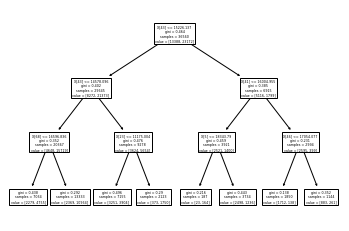

In [58]:
tree.plot_tree(clf_pruned) 

In [59]:
score = clf_pruned.score(x_test, y_test)
print(score)

0.7388688327316486
